In [81]:
import pandas as pd
import scipy as sc
import seaborn as sns
from sklearn import preprocessing, ensemble, gaussian_process, feature_selection, linear_model, svm, model_selection, dummy

In [2]:
data=pd.read_csv('winequality-white.csv', sep=';')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data[data.columns[:-1]].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [74]:
X,Xt,r,rt = model_selection.train_test_split(data[data.columns[:-1]], data['quality'], test_size=.2)

raise Exception

In [7]:
coefs = []

In [8]:
m = dummy.DummyRegressor()

In [9]:
m.fit(X,r)
m.score(Xt,rt)

-6.7066912822433267e-05

In [10]:
m = linear_model.LinearRegression()

In [11]:
m.fit(X,r)
coefs.append(m.coef_)
m.score(Xt,rt)

0.28223801417019534

In [12]:
m = linear_model.LassoLarsCV()

In [13]:
m.fit(X,r)
coefs.append(m.coef_)
m.score(Xt,rt)

0.27955142695721535

In [14]:
m = linear_model.ElasticNetCV()

In [15]:
m.fit(X,r)
coefs.append(m.coef_)
m.score(Xt,rt)

0.24497698657181677

In [16]:
m = linear_model.RidgeCV()

In [17]:
m.fit(X,r)
coefs.append(m.coef_)
m.score(Xt,rt)

0.27424424142802173

In [18]:
m = linear_model.RANSACRegressor()

In [19]:
m.fit(X,r)
m.score(Xt,rt)

0.16029708650613572

In [47]:
m = gaussian_process.GaussianProcessRegressor(
    kernel=gaussian_process.kernels.RationalQuadratic()
)

In [102]:
m = ensemble.GradientBoostingRegressor(n_estimators=100)

In [97]:
m = ensemble.RandomForestRegressor(n_estimators=100)

In [103]:
m.fit(X,r)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [104]:
m.score(Xt,rt)

0.40553467607034377

(<matplotlib.figure.Figure at 0x7fd82bd27ac8>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7fd82bdce978>])

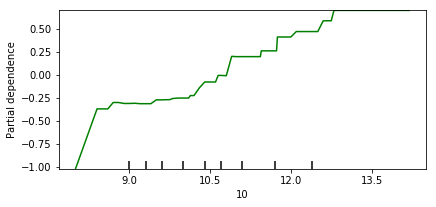

In [112]:
ensemble.partial_dependence.plot_partial_dependence(m, X, (10,))

pd.DataFrame(sc.array([m.coef_,]), columns=data[data.columns[:-1]].columns)

In [25]:
pd.DataFrame(sc.array(coefs), columns=data[data.columns[:-1]].columns)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.063253,-1.844335,0.005273,0.082280,-0.141823,0.002878,-0.000119,-147.439169,0.682989,0.652460,0.205658
1,0.000000,-1.854847,0.000000,0.055398,-0.406216,0.002583,0.000000,-82.142899,0.389083,0.513421,0.273422
2,-0.047815,-0.723296,0.000000,0.021448,-0.000000,0.005836,-0.001286,-0.000000,0.000000,0.007266,0.352749
3,-0.047245,-1.931759,-0.047875,0.027652,-0.775161,0.003906,-0.000678,-1.924550,0.176620,0.447709,0.368674


In [73]:
pd.DataFrame(sc.array([m.feature_importances_>.1,]), columns=data[data.columns[:-1]].columns)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,False,True,False,False,False,True,False,False,False,False,True


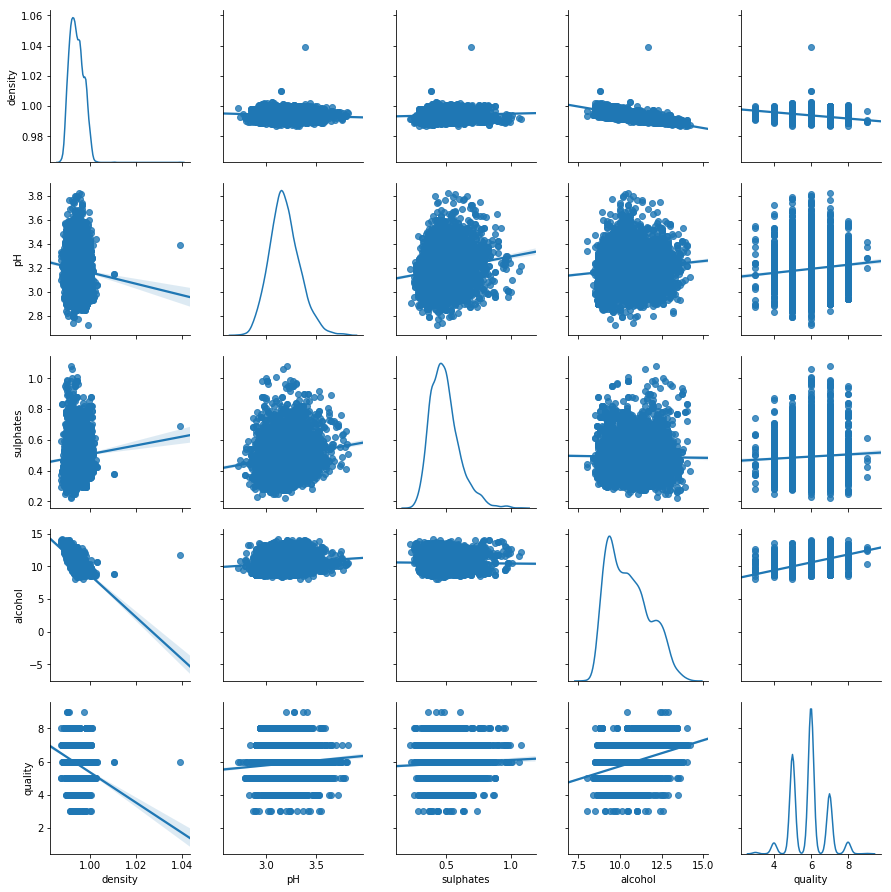

In [26]:
sns.pairplot(data[data.columns[-5:]], kind='reg', diag_kind='kde')